# Overfitting and Underfitting

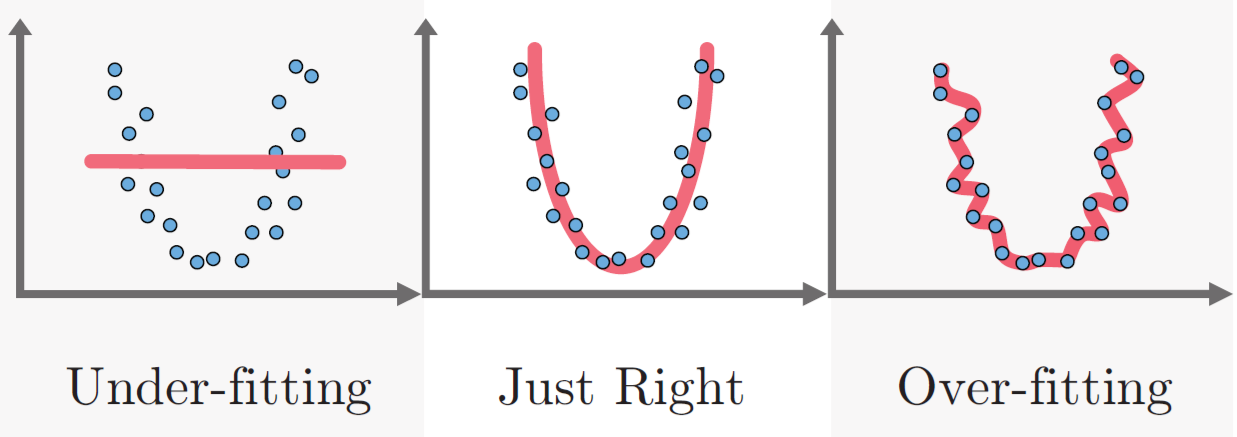



From the three graphs shown above, one can clearly understand that the leftmost figure line does not cover all the data points, so we can say that the model is under-fitted. In this case, the model has failed to generalize the pattern to the new dataset, leading to poor performance on testing. The under-fitted model can be easily seen as it gives very high errors on both training and testing data. This is because the dataset is not clean and contains noise, the model has High Bias, and the size of the training data is not enough.  

When it comes to the overfitting, as shown in the rightmost graph, it shows the model is covering all the data points correctly, and you might think this is a perfect fit. But actually, no, it is not a good fit! Because the model learns too many details from the dataset, it also considers noise. Thus, it negatively affects the new data set; not every detail that the model has learned during training needs also apply to the new data points, which gives a poor performance on testing or validation dataset. This is because the model has trained itself in a very complex manner and has high variance.

To read about it more, please refer [this](https://analyticsindiamag.com/understanding-overfitting-and-underfitting-for-data-science/) article.

# Observing the effect of Overfitting and Underfitting practically: 


* __Sklearn inbuild dataset is used for prediction__
* __KFold Cross validation is used to create K no of train test test split__

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels tensorflow keras --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
import matplotlib.pyplot as plt # To Visualize the plots
import pandas as pd # To handle Dataset
import numpy as np  # To create array
 
from sklearn.datasets import load_diabetes # Sklearn builtin dataset 
from sklearn.metrics import mean_absolute_error # to check errors between predicted values and actual value 
from sklearn.model_selection import KFold   # To create K number of train test split 

# Algorithms used for predictions
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

In [ ]:
load_data = load_diabetes() # Load the dataset
x = load_data.data     # selecting input features
y = load_data.target   # target variable
pd.DataFrame(x,columns=load_data.feature_names).head() # See the distribution of data

###Decision Tree 

In [ ]:
kf = KFold(n_splits=20,shuffle=True) # defining fold parameters 

# created empty list to append score and error
training_error = []
training_accuracy = []
testing_error = []
testing_accuracy = []

for train_index,test_index in kf.split(x):
    # devide the data into train and test
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]
    
    #load the Linear Regression model
    model = DecisionTreeRegressor()
    model.fit(x_train,y_train)
    
    #get the prediction for train and test data 
    train_data_pred = model.predict(x_train)
    test_data_pred = model.predict(x_test)
    
    #appending the errors to the list
    training_error.append(mean_absolute_error(y_train,train_data_pred))
    testing_error.append(mean_absolute_error(y_test,test_data_pred))
    
    #appending the accuracy to the list
    training_accuracy.append(model.score(x_train,y_train))
    testing_accuracy.append(model.score(x_test,y_test))

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Trainng error across folds')

plt.subplot(2,2,2)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Testing error across folds')

plt.subplot(2,2,3)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_accuracy).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')

plt.subplot(2,2,4)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_accuracy).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')

###Linear Regression

In [ ]:
kf = KFold(n_splits=20,shuffle=True) # defining fold parameters 

# created empty list to append score and error
training_error = []
training_accuracy = []
testing_error = []
testing_accuracy = []

for train_index,test_index in kf.split(x):
    # devide the data into train and test
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]
    
    #load the Linear Regression model
    model = LinearRegression()
    model.fit(x_train,y_train)
    
    #get the prediction for train and test data 
    train_data_pred = model.predict(x_train)
    test_data_pred = model.predict(x_test)
    
    #appending the errors to the list
    training_error.append(mean_absolute_error(y_train,train_data_pred))
    testing_error.append(mean_absolute_error(y_test,test_data_pred))
    
    #appending the accuracy to the list
    training_accuracy.append(model.score(x_train,y_train))
    testing_accuracy.append(model.score(x_test,y_test))

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Trainng error across folds')

plt.subplot(2,2,2)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_error).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Error')
plt.title('Testing error across folds')

plt.subplot(2,2,3)
plt.plot(range(1,kf.get_n_splits()+1),np.array(training_accuracy).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')

plt.subplot(2,2,4)
plt.plot(range(1,kf.get_n_splits()+1),np.array(testing_accuracy).ravel(),'o-')
plt.xlabel('No of folds')
plt.ylabel('Accuracy')
plt.title('Testing accuracy across folds')